In [23]:
import numpy as np
from scipy import integrate
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

import datetime

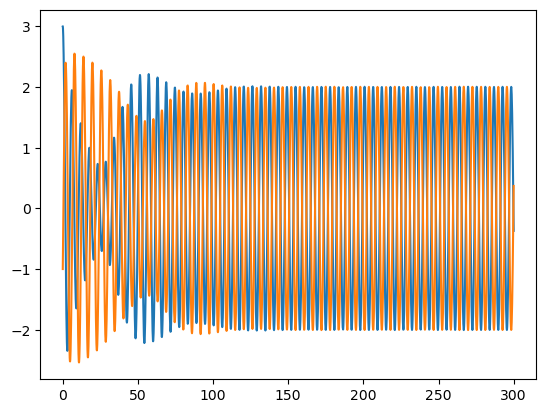

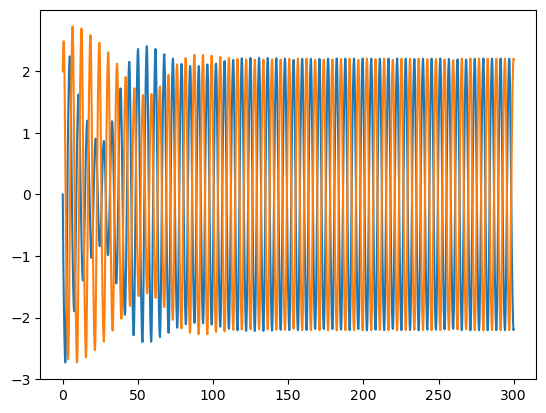

2327


In [93]:
def coupled_vdp_deriv(t, X, eps, k):
    x1, y1, x2, y2 = X
    return [y1, -eps*(x1*x1 - 1)*y1 - x1 - k*(x1 - x2), y2, -eps*(x2*x2 - 1)*y2 - x2 - k*(x2 - x1)]


N = 2

X0 = [3, 0, -1, 2]
# interesting oscillation X0 = [3, 0, -1, 2]

EPSILON = 0.1
KAPPA = 0.1

t_start = 0.0
t_stop = 300

sol = solve_ivp(coupled_vdp_deriv, 
                [t_start, t_stop],
                X0,
                args=[EPSILON, KAPPA],
                method="LSODA",
                dense_output=True)
t = sol.t
x1, y1, x2, y2 = sol.y
X = np.array([(x1, y1), (x2, y2)])

plt.plot(t, x1)
plt.plot(t, x2)
plt.savefig('figs/interestingoscillations1.png', dpi=300, format='png', transparent=False)
plt.show()

plt.plot(t, y1)
plt.plot(t, y2)
plt.savefig('figs/interestingoscillations2.png', dpi=300, format='png', transparent=False)
plt.show()

'''
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.show()

# choose a different color for each trajectory
colors = plt.cm.jet(np.linspace(0, 1, N))
#plt.plot(sol.t, x1)
#plt.show()

# set up lines and points
lines = sum([ax.plot([], [], [], '-', c=c)
             for c in colors], [])
pts = sum([ax.plot([], [], [], 'o', c=c)
           for c in colors], [])

# prepare the axes limits
ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))

# initialization function: plot the background of each frame
def init():
    for line, pt in zip(lines, pts):
        line.set_data([], [])
        #line.set_3d_properties([])

        pt.set_data([], [])
        #pt.set_3d_properties([])
    return lines + pts


# animation function.  This will be called sequentially with the frame number
def animate(i):
    # we'll step two time-steps per frame.  This leads to nice results.

    for line, pt, xi in zip(lines, pts, X):
        x, y = xi
        line.set_data(x, y)

        pt.set_data(x[-1:], y[-1:])

    #ax.view_init(30, 0.3 * i)
    fig.canvas.draw()
    return lines + pts

# instantiate the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=30, blit=True)

# Save as mp4. This requires mplayer or ffmpeg to be installed
anim.save('figs/lorentz_attractor.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

plt.show()
'''

print(t.shape[0])

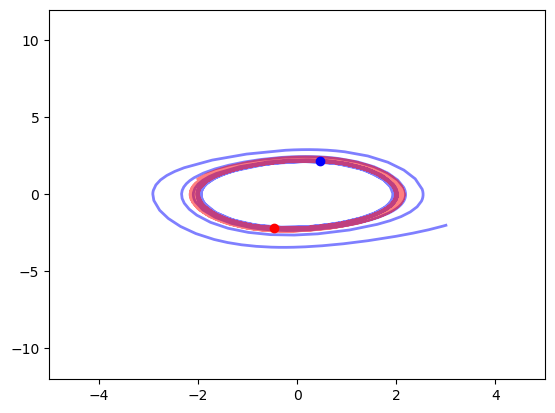

In [91]:
#fig = plt.figure()
#ax = fig.add_axes([0, 0, 1, 1])
fig, ax = plt.subplots()
colors = ["blue", "red"]

#lines = sum(ax.plot([], [], '-', c=c)
#             for c in colors)
#pts = sum(ax.plot([], [], 'o', c=c)
#             for c in colors)

line1, = ax.plot([], [], '-', c=colors[0], lw=2, alpha=0.5, zorder=-1)
pt1, = ax.plot([], [], 'o', c=colors[0], zorder=1)

line2, = ax.plot([], [], '-', c=colors[1], lw=2, alpha=0.5, zorder=-1)
pt2, = ax.plot([], [], 'o', c=colors[1], zorder=1)

# prepare the axes limits
#ax.set_xlim(-5, 5)
#ax.set_ylim(-20, 20)
ax.axis('on')
#plt.show()
#ax.axis('equal')


# initialization function: plot the background of each frame
def init():
    ax.set_xlim(-5, 5)
    ax.set_ylim(-12, 12)
    #ax.axis('on')
    #ax.axis('on')
    line1.set_data([], [])
    line2.set_data([], [])
    pt1.set_data([], [])
    pt2.set_data([], [])
    #for line, pt in zip(lines, pts):
    #    line.set_data([], [])
    #    pt.set_data([], [])
    return line1, line2, pt1, pt2

# animation function.  This will be called sequentially with the frame number
def animate(i):
   

    i = (2 * i) % t.shape[0]

    line1.set_data(x1[:i], y1[:i])
    pt1.set_data([x1[i]], [y1[i]])

    line2.set_data(x2[:i], y2[:i])
    pt2.set_data([x2[i]], [y2[i]])
    #for line, pt, xi in zip(lines, pts, X):
    #    x, y = xi
    #    line.set_data(x[i], y[i])

    #    pt.set_data(x[i], y[i])

    #ax.view_init(30, 0.3 * i)
    #fig.canvas.draw()
    return line1, line2, pt1, pt2

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=2000, interval=30, blit=True)

# Save as mp4. This requires mplayer or ffmpeg to be installed
anim.save(f'figs/portrait_X0={str(X0)}_eps={EPSILON}_k={KAPPA}_{datetime.datetime.now()}.mp4', fps=15, extra_args=['-vcodec', 'libx264'])



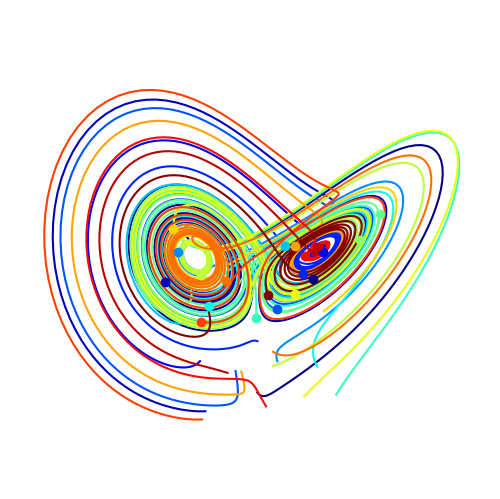

In [4]:
N_trajectories = 20


def lorentz_deriv(X, t0, sigma=10., beta=8./3, rho=28.0):
    x, y, z = X
    """Compute the time-derivative of a Lorentz system."""
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]


# Choose random starting points, uniformly distributed from -15 to 15
np.random.seed(1)
x0 = -15 + 30 * np.random.random((N_trajectories, 3))

# Solve for the trajectories
t = np.linspace(0, 4, 1000)
x_t = np.asarray([integrate.odeint(lorentz_deriv, x0i, t)
                  for x0i in x0])

# Set up figure & 3D axis for animation
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.axis('off')

# choose a different color for each trajectory
colors = plt.cm.jet(np.linspace(0, 1, N_trajectories))

# set up lines and points
lines = sum([ax.plot([], [], [], '-', c=c)
             for c in colors], [])
pts = sum([ax.plot([], [], [], 'o', c=c)
           for c in colors], [])

# prepare the axes limits
ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((5, 55))

# set point-of-view: specified by (altitude degrees, azimuth degrees)
ax.view_init(30, 0)

# initialization function: plot the background of each frame
def init():
    for line, pt in zip(lines, pts):
        line.set_data([], [])
        line.set_3d_properties([])

        pt.set_data([], [])
        pt.set_3d_properties([])
    return lines + pts

# animation function.  This will be called sequentially with the frame number
def animate(i):
    # we'll step two time-steps per frame.  This leads to nice results.
    i = (2 * i) % x_t.shape[1]

    for line, pt, xi in zip(lines, pts, x_t):
        x, y, z = xi[:i].T
        line.set_data(x, y)
        line.set_3d_properties(z)

        pt.set_data(x[-1:], y[-1:])
        pt.set_3d_properties(z[-1:])

    ax.view_init(30, 0.3 * i)
    fig.canvas.draw()
    return lines + pts

# instantiate the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=30, blit=True)

# Save as mp4. This requires mplayer or ffmpeg to be installed
anim.save('figs/lorentz_attractor.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

plt.show()